# Support Vector Machine

Objective: Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope  
Dataset: abalone.data  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('abalone.data', header=None)
print(data.shape)
data.head()

(4177, 9)


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
#rename column
data.columns = ['Sex','Length','Diameter','Height','WholeHeight','ShuckedWeight','VisceraWeight','ShellWeight','RingsAge']
data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Exploration

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


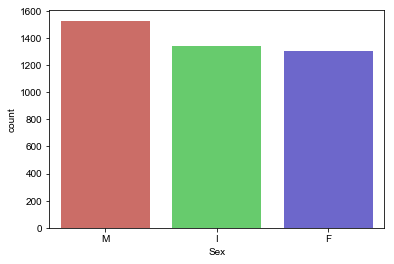

In [3]:
print(data['Sex'].value_counts())

sns.countplot(x='Sex',data = data, palette='hls',order = data['Sex'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: RingsAge, dtype: int64


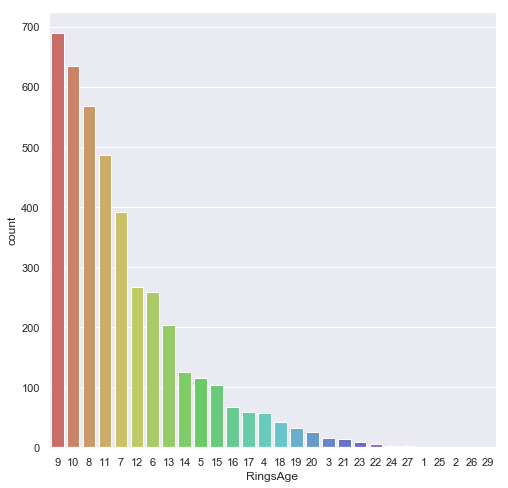

In [4]:
print(data['RingsAge'].value_counts())

sns.countplot(x='RingsAge',data = data, palette='hls',order = data['RingsAge'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [5]:
data['Sex']= data['Sex'].replace('M', 1)
data['Sex']= data['Sex'].replace('F', 0)
data['Sex']= data['Sex'].replace('I', 2)

data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Correlation

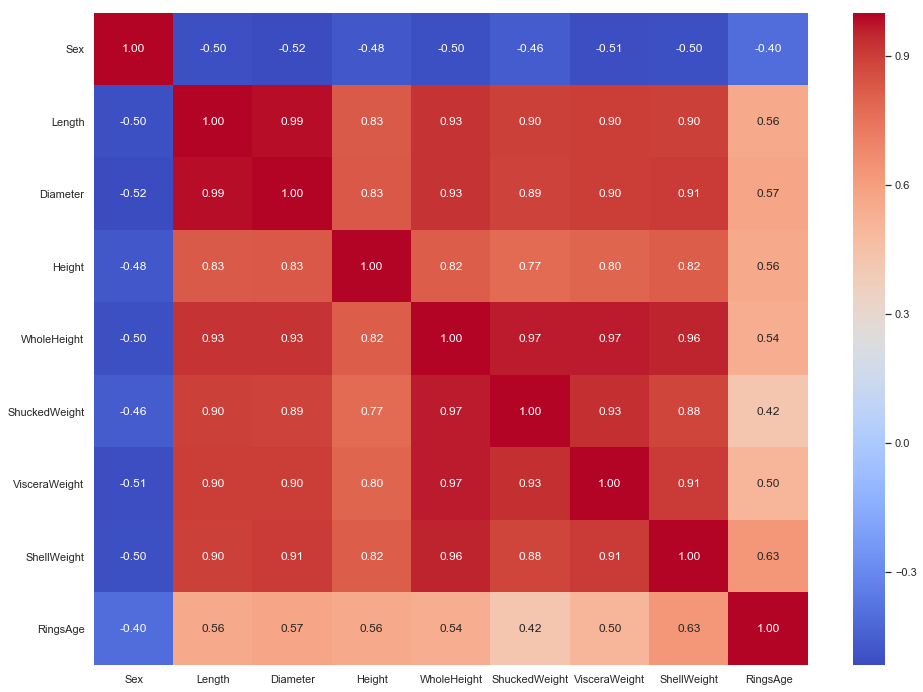

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [7]:
corr_rank = data.corr()
corr_rank["RingsAge"].sort_values(ascending=False)

RingsAge         1.000000
ShellWeight      0.627574
Diameter         0.574660
Height           0.557467
Length           0.556720
WholeHeight      0.540390
VisceraWeight    0.503819
ShuckedWeight    0.420884
Sex             -0.401445
Name: RingsAge, dtype: float64

## Data Processing and Selection

In [8]:
#Feature dataset
X=data.iloc[:, :-1] #from 1st variable until 2nd last var
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (4177, 8)


,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07


In [9]:
#Target dataset
y = data["RingsAge"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (4177,)


0    15
1     7
2     9
3    10
4     7
Name: RingsAge, dtype: int64

In [10]:
#Normalizae X dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (4177, 8)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


array([[-0.0105225 , -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-0.0105225 , -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732]])

## Split Train Test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Default Parameter
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(gamma='auto') #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Kernel Accuracy Score')
print('- Default:',round(metrics.accuracy_score(y_test,y_pred),4))

#Linear Kernel
svc=SVC(kernel='linear', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Linear :',round(metrics.accuracy_score(y_test,y_pred),4))

#RBF Kernel
svc=SVC(kernel='rbf', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- RBF    :', round(metrics.accuracy_score(y_test,y_pred),4))

#Polynomial kernel
svc=SVC(kernel='poly', gamma='auto')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('- Polynomial:', round(metrics.accuracy_score(y_test,y_pred),4))

Kernel Accuracy Score
- Default: 0.2656
- Linear : 0.2667
- RBF    : 0.2656
- Polynomial: 0.2476


In [12]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

accuracy_score= metrics.accuracy_score(y_test,y_predict)
print('Linear accuracy score:', round(accuracy_score,4))

Linear accuracy score: 0.2596


## Test Prediction

In [13]:
df_pred1 = data[data.index == 4000]
df_pred2 = data[data.index == 4176]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
4000,2,0.455,0.350,0.135,0.5365,0.2855,0.0855,0.1325,7
4176,1,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [14]:
df_pred=df_pred.iloc[:, :-1]
scaler = StandardScaler()
scaler.fit(df_pred)
df_pred = scaler.transform(df_pred)

predict_result=svc.predict(df_pred)
predict_result

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([ 7, 10], dtype=int64)